In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import expon

## Simulation Exponential Distribution

Estimated Lambda: 1.40


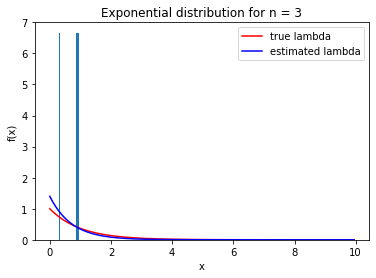

Estimated Lambda: 1.35


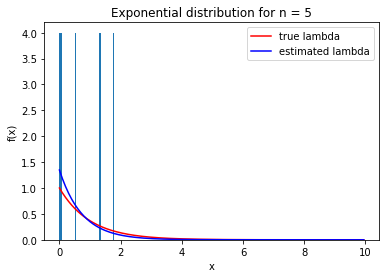

Estimated Lambda: 1.21


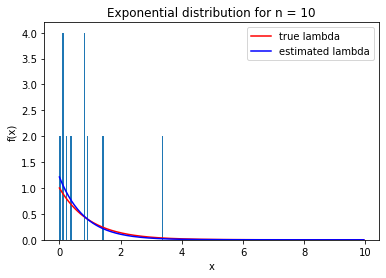

Estimated Lambda: 1.07


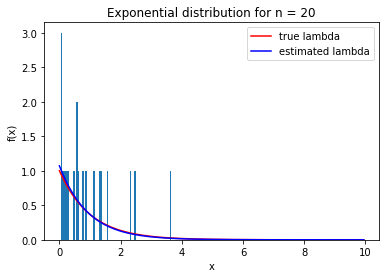

Estimated Lambda: 0.82


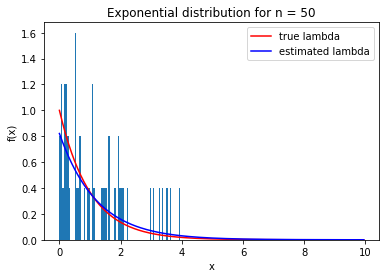

Estimated Lambda: 1.21


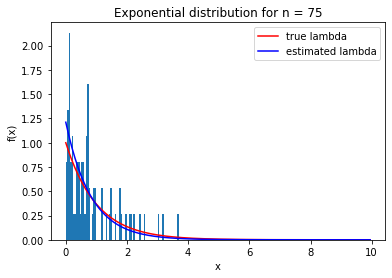

Estimated Lambda: 0.91


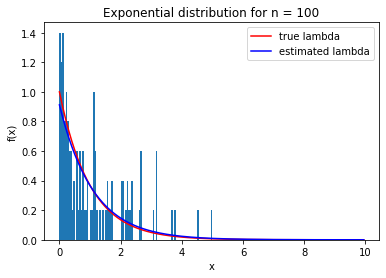

Estimated Lambda: 0.90


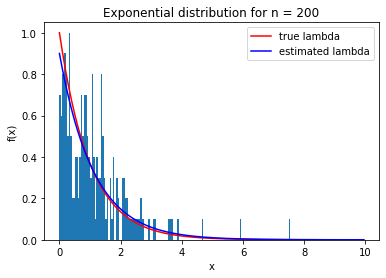

Estimated Lambda: 0.98


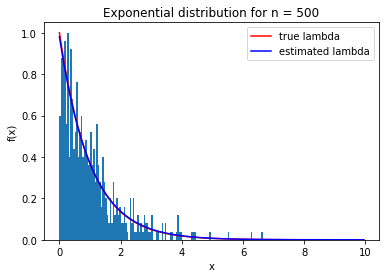

Estimated Lambda: 0.95


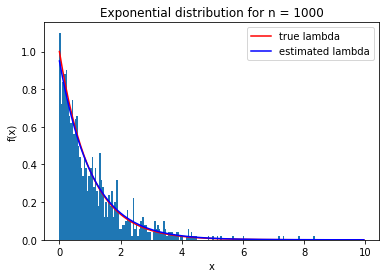

Estimated Lambda: 1.00


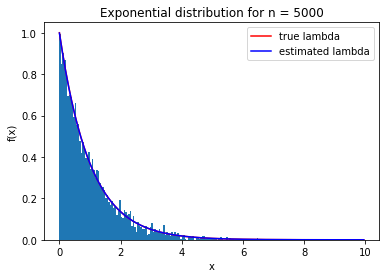

Estimated Lambda: 0.99


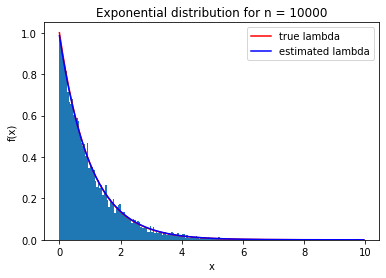

Estimated Lambda: 1.00


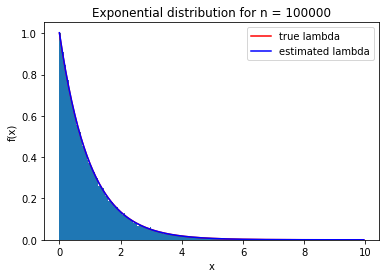

Estimated Lambda: 1.00


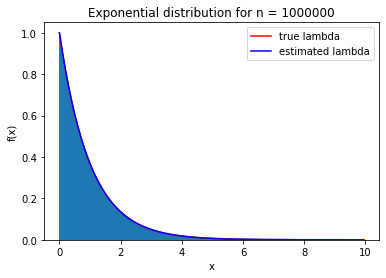

Development of estimated lambda for increasing n (logscale for x-axis):


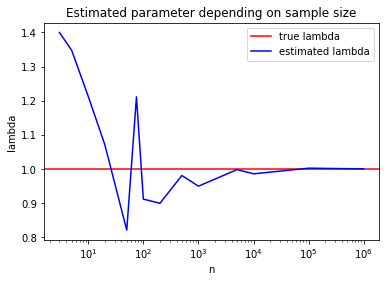

In [16]:
# estimate lambda from the data (see Maximum Likelihood)
def estimate_lam(x, n):
    return n/np.sum(x)

lam = 1
sample_size = [3, 5, 10, 20, 50, 75, 100, 200, 500, 1000, 5000, 10000, 100000, 1000000]
est_params = []

for n in sample_size:
    # generate data using exponential distribution with lambda=5
    # attention: scale is the inverse of lambda (1/lambda) !!!
    data = np.random.exponential(scale=1/lam, size=n)
    
    # estimate lambda with data
    est = estimate_lam(data, n)
    est_params.append(est)
    print("Estimated Lambda: {:.2f}".format(est))

    # plot the sample data, the actual exponential distribution with lambda=5 and the exponential distribution with estimated lambda
    fig, ax = plt.subplots(1,1)
    x_axis = np.arange(0, 10, 0.05)
    ax.hist(data, bins=x_axis, density=True)
    ax.plot(x_axis, expon.pdf(x_axis, scale=1/lam), color='red')
    ax.plot(x_axis, expon.pdf(x_axis, scale=1/est), color='blue')
    ax.set_title("Exponential distribution for n = " + str(n))
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.legend(['true lambda', 'estimated lambda'])
    plt.savefig("Exp n=" + str(n))
    plt.show()
    
    
# plot the estimated and true parameter depending on sample size n
print("Development of estimated lambda for increasing n (logscale for x-axis):")
fig, ax = plt.subplots(1,1)
ax.axhline(y=1.0, color='red')
ax.plot(sample_size, est_params, color='blue')
# logarithmic x-axis
ax.semilogx()
ax.set_title("Estimated parameter depending on sample size")
ax.set_xlabel("n")
ax.set_ylabel("lambda")
ax.legend(["true lambda", "estimated lambda"])
plt.savefig("Development of estimated parameter")
plt.show()
